<a href="https://colab.research.google.com/github/FauzZtad/Data-Cleansing-Rent-Apart-Home/blob/main/Rent%20Apart%20%26%20Home%20Cleansing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import Module

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import warnings
warnings.filterwarnings('ignore')

# 1. Persiapan Data Awal

In [5]:
data = pd.read_csv('/content/AB_NYC_2019.csv')

In [6]:
data.shape

(5018, 15)

In [7]:
data.head(10)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,availability_365
0,34229869,Cozy Living Room Futon,27537930,Preston,Bronx,Pelham Gardens,40.86209,-73.84667,Shared room,20.0,1,NaN,NaN,NaN,5
1,31568673,Large private room w/ 2 built-in closets,236631469,Paloma,Bronxx,Williamsbridge,40.88449,-73.86227,Private room,25.0,30,NaN,NaN,NaN,85
2,36199363,Furnished room for rent in Bronx SINGLE FEMALE,272247972,Kadeen,Bronxx,Olinville,40.88116,-73.86547,Shared room,25.0,90,NaN,NaN,NaN,190
3,34180340,Sunny & Spacious Room,181233778,Aishah,Bronxx,Belmont,40.85595,-73.88519,Private room,27.0,30,NaN,NaN,NaN,68
4,32364762,Bronx,19303369,Hiroki,Bronxx,Kingsbridge,40.88474,-73.90321,Private room,27.0,30,NaN,NaN,NaN,0
5,19054683,Fully-furnished modern apartment,97907084,Kim,Bronxx,Wakefield,40.90281,-73.85201,Entire home/apt,28.0,1,NaN,NaN,NaN,0
6,36243183,Spacious private room #2,35783912,Pi & Leo,Bronxx,Fordham,40.86264,-73.89139,Private room,29.0,2,NaN,NaN,NaN,81
7,33528562,"Private, warm & inviting contemporary space.",252641467,Antoinette,Bronx,Wakefield,40.88491,-73.85484,Private room,33.0,1,NaN,NaN,NaN,116
8,18442048,Clean-N-Comfy Bronx Pad,25385574,Che,Bronx,Allerton,40.86718,-73.86235,Private room,33.0,1,NaN,NaN,NaN,179
9,36243240,spacious private room #3,35783912,Pi & Leo,Bronx,Fordham,40.86263,-73.89088,Private room,33.0,2,NaN,NaN,NaN,84


# 2. Pengecekan Missing Value

In [8]:
#Informasi dalam csv
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5018 entries, 0 to 5017
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   5018 non-null   int64  
 1   name                 5017 non-null   object 
 2   host_id              5018 non-null   int64  
 3   host_name            5017 non-null   object 
 4   neighbourhood_group  5018 non-null   object 
 5   neighbourhood        5018 non-null   object 
 6   latitude             5018 non-null   float64
 7   longitude            5018 non-null   float64
 8   room_type            5018 non-null   object 
 9   price                4966 non-null   float64
 10  minimum_nights       5018 non-null   int64  
 11  number_of_reviews    4143 non-null   float64
 12  last_review          4143 non-null   object 
 13  reviews_per_month    4143 non-null   float64
 14  availability_365     5018 non-null   int64  
dtypes: float64(5), int64(4), object(6)
mem

Dalam kolom last_review berisi data tanggal namun tipe datanya object atau string. Mari kita sesuaikan menjadi tipe data date

In [11]:
data['last_review'] = pd.to_datetime(data['last_review'])

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5018 entries, 0 to 5017
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   id                   5018 non-null   int64         
 1   name                 5017 non-null   object        
 2   host_id              5018 non-null   int64         
 3   host_name            5017 non-null   object        
 4   neighbourhood_group  5018 non-null   object        
 5   neighbourhood        5018 non-null   object        
 6   latitude             5018 non-null   float64       
 7   longitude            5018 non-null   float64       
 8   room_type            5018 non-null   object        
 9   price                4966 non-null   float64       
 10  minimum_nights       5018 non-null   int64         
 11  number_of_reviews    4143 non-null   float64       
 12  last_review          4143 non-null   datetime64[ns]
 13  reviews_per_month    4143 non-nul

Ternyata ada 6 kolom yang memiliki missing values



In [14]:
#Pengecekan missing values menggunakan isna() atau isnull()
data.isna().sum()

id                       0
name                     1
host_id                  0
host_name                1
neighbourhood_group      0
neighbourhood            0
latitude                 0
longitude                0
room_type                0
price                   52
minimum_nights           0
number_of_reviews      875
last_review            875
reviews_per_month      875
availability_365         0
dtype: int64

In [15]:
#Hitung persentase missing values
(data.isna().sum() / data.shape[0]) * 100

id                      0.000000
name                    0.019928
host_id                 0.000000
host_name               0.019928
neighbourhood_group     0.000000
neighbourhood           0.000000
latitude                0.000000
longitude               0.000000
room_type               0.000000
price                   1.036269
minimum_nights          0.000000
number_of_reviews      17.437226
last_review            17.437226
reviews_per_month      17.437226
availability_365        0.000000
dtype: float64

Untuk nilai null pada kolom name tidak berada dalam baris yang sama dengan nilai null pada host_name

In [16]:
#mari kita investigasi lebih lanjut
data[data['name'].isna()].head(10)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,availability_365
120,12988898,NaN,71552588,Andrea,Bronx,Fordham,40.86032,-73.88493,Shared room,130.0,1,NaN,NaT,NaN,365


In [17]:
#investigasi number_of_reviews
data[data['number_of_reviews'].isna()].head(10)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,availability_365
0,34229869,Cozy Living Room Futon,27537930,Preston,Bronx,Pelham Gardens,40.86209,-73.84667,Shared room,20.0,1,NaN,NaT,NaN,5
1,31568673,Large private room w/ 2 built-in closets,236631469,Paloma,Bronxx,Williamsbridge,40.88449,-73.86227,Private room,25.0,30,NaN,NaT,NaN,85
2,36199363,Furnished room for rent in Bronx SINGLE FEMALE,272247972,Kadeen,Bronxx,Olinville,40.88116,-73.86547,Shared room,25.0,90,NaN,NaT,NaN,190
3,34180340,Sunny & Spacious Room,181233778,Aishah,Bronxx,Belmont,40.85595,-73.88519,Private room,27.0,30,NaN,NaT,NaN,68
4,32364762,Bronx,19303369,Hiroki,Bronxx,Kingsbridge,40.88474,-73.90321,Private room,27.0,30,NaN,NaT,NaN,0
5,19054683,Fully-furnished modern apartment,97907084,Kim,Bronxx,Wakefield,40.90281,-73.85201,Entire home/apt,28.0,1,NaN,NaT,NaN,0
6,36243183,Spacious private room #2,35783912,Pi & Leo,Bronxx,Fordham,40.86264,-73.89139,Private room,29.0,2,NaN,NaT,NaN,81
7,33528562,"Private, warm & inviting contemporary space.",252641467,Antoinette,Bronx,Wakefield,40.88491,-73.85484,Private room,33.0,1,NaN,NaT,NaN,116
8,18442048,Clean-N-Comfy Bronx Pad,25385574,Che,Bronx,Allerton,40.86718,-73.86235,Private room,33.0,1,NaN,NaT,NaN,179
9,36243240,spacious private room #3,35783912,Pi & Leo,Bronx,Fordham,40.86263,-73.89088,Private room,33.0,2,NaN,NaT,NaN,84


Memastikan apakah nilai null pada kolom number_of_reviews sama dengan nilai null dalam kolom last_review dan reviews_per_month

In [18]:
data[(data['number_of_reviews'].isnull()) & (data['last_review'].isnull()) & (data['reviews_per_month'].isnull())].shape

(875, 15)

Kolom number_of_reviews dapat dipastikan memiliki nilai null di baris yang sama dengan kolom last_review dan reviews_per_month. Hal ini dibuktikan dengan jumlah baris hasil filter yang berjumlah sama dengan hasil pengecekan missing values di awal yaitu 875 baris.


# 3. Pembersihan Data



###Duplicated Data








In [19]:
#cek data duplikat
print(f'Jumlah data duplikat {data.duplicated().sum()}')

Jumlah data duplikat 19


In [20]:
#hapus data duplikat
data = data.drop_duplicates().reset_index(drop=True)

In [21]:
#cek data duplikat setelah dihapus
print(f'Jumlah data duplikat {data.duplicated().sum()}')

Jumlah data duplikat 0


###Pengecekan kolom *name*

Terdapat 1 baris dalam kolom *name* yang bernilai null. Dikarenakan hanya 1 kolom, mari kita lakukan penanganan dengan menghapus baris tersebut

In [22]:
data[data['name'].isna()].head(10)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,availability_365
120,12988898,NaN,71552588,Andrea,Bronx,Fordham,40.86032,-73.88493,Shared room,130.0,1,NaN,NaT,NaN,365


In [23]:
data.drop(data[(data['name'].isnull())].index, inplace=True)

In [24]:
#cek data
data[data['name'].isna()].head(10)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,availability_365


Melakukan pengecekan penulisan dalam kolom name agar data bersifat konsisten

In [25]:
data['name'].value_counts()

name
Hillside Hotel                                       18
Home away from home                                   8
New york Multi-unit building                          5
步行9分钟到法拉盛缅街中心的电梯房,提供免费矿泉水可乐                           3
Prolonged Traveler's Dream (a month first & more)     3
                                                     ..
Astoria's Tranquil Home Away From Home                1
Super Cozy Studio Apartment                           1
cozy zen master bedroom minutes from Manhattan.       1
Ideal vacationing spot for beach lovers, near JFK     1
Room near JFK Queen Bed                               1
Name: count, Length: 4917, dtype: int64

In [26]:
#Agar penulisan menjadi kapital untuk setiap kata
data['name'] = data['name'].str.title()

In [27]:
data['name'].value_counts()

name
Hillside Hotel                          18
Home Away From Home                     12
New York Multi-Unit Building             5
Private Room                             4
Cozy Home Away From Home                 4
                                        ..
Mini Casa                                1
Town Home One                            1
家庭式雙人房K                                  1
Geraldine'S  1 Br Apt 5 Min From Jfk     1
Room Near Jfk Queen Bed                  1
Name: count, Length: 4889, dtype: int64

###Pengecekan kolom *host_name*

DIkarenakan terdapat satu baris dalam kolom *host_name* yang bernilai null, maka kita hapus saja.

In [28]:
data[data['host_name'].isna()].head(10)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,availability_365
3912,100184,Bienvenue,526653,NaN,Queens,Queens Village,40.72413,-73.76133,Private room,50.0,1,43.0,2019-07-08,0.45,88


In [29]:
data.drop(data[(data['host_name'].isnull())].index, inplace=True)

In [30]:
data[data['host_name'].isna()].head(10)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,availability_365


###Pengecekan kolom *neighbourhood group*

In [31]:
data['neighbourhood_group'].value_counts()

neighbourhood_group
Queens       3443
Bronx         741
Brooklyn      711
QUeens         38
Brooklynn      37
Bronxx         27
Name: count, dtype: int64

Terlihat ada yang janggal terkait penulisan antara Bronx dengan Bronxx, Queens dengan QUeens, dan Brooklyn dengan Brooklynn. Mari kita sesuaikan data dalam kolom ini.

In [32]:
data['neighbourhood_group'] = data['neighbourhood_group'].replace('Bronxx', 'Bronx')
data['neighbourhood_group'] = data['neighbourhood_group'].replace('QUeens', 'Queens')
data['neighbourhood_group'] = data['neighbourhood_group'].replace('Brooklynn', 'Brooklyn')

In [33]:
data['neighbourhood_group'].value_counts()

neighbourhood_group
Queens      3481
Bronx        768
Brooklyn     748
Name: count, dtype: int64

###Pengecekan kolom *minimum_nights*

In [34]:
data['minimum_nights'].value_counts()

minimum_nights
 1       1994
 2       1348
 3        642
 30       260
 4        199
 5        165
 7        158
 6         39
 14        33
 15        19
 28        19
 20        17
 10        16
 29        16
 9          9
 21         8
 90         7
 60         6
 31         5
 180        3
 18         3
 35         3
 25         2
 27         2
 45         2
 16         2
 365        2
 12         2
 85         1
 13         1
 11         1
 40         1
-1          1
 8          1
 22         1
 26         1
 93         1
 62         1
 37         1
 5000       1
 24         1
 91         1
 17         1
 210        1
Name: count, dtype: int64

Terdapat kejanggalan dalam informasi kolom minimum_nights yaitu informasi bernilai negatif dan bernilai 5000. Mari kita sesuaikan data dalam kolom tersebut.

In [35]:
#Dikarenakan data hanya berjumlah satu, maka kita hapus saja

#Hilangkan baris yang memuat -1
data.drop(data[data['minimum_nights'] == -1].index, inplace=True)

#Hilangkan baris yang memuat 5000
data.drop(data[data['minimum_nights'] == 5000].index, inplace=True)

In [36]:
data['minimum_nights'].value_counts()

minimum_nights
1      1994
2      1348
3       642
30      260
4       199
5       165
7       158
6        39
14       33
15       19
28       19
20       17
10       16
29       16
9         9
21        8
90        7
60        6
31        5
35        3
180       3
18        3
12        2
25        2
27        2
45        2
16        2
365       2
85        1
210       1
17        1
24        1
62        1
37        1
93        1
13        1
26        1
22        1
8         1
40        1
11        1
91        1
Name: count, dtype: int64

#Imputasi Process

###Mengisi kolom *price*

[]

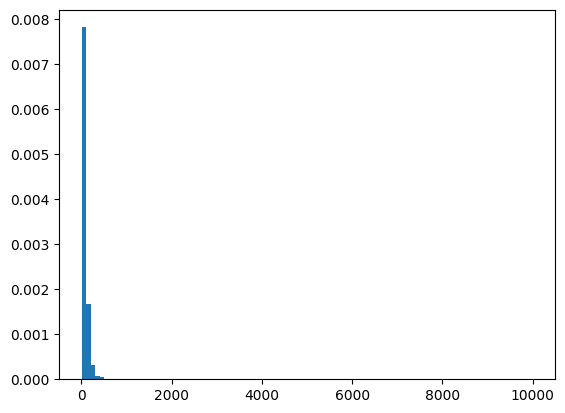

In [37]:
plt.hist(data['price'], density=True, bins=100)
plt.plot()

In [38]:
median_price = data['price'].median()
print(median_price)

68.0


In [39]:
data['price'] = data['price'].fillna(median_price)

In [41]:
data.isna().sum()

id                       0
name                     0
host_id                  0
host_name                0
neighbourhood_group      0
neighbourhood            0
latitude                 0
longitude                0
room_type                0
price                    0
minimum_nights           0
number_of_reviews      872
last_review            872
reviews_per_month      872
availability_365         0
dtype: int64

###Mengisi kolom *number_of_reviews*, *last_review*, *reviews_per_month*

[]

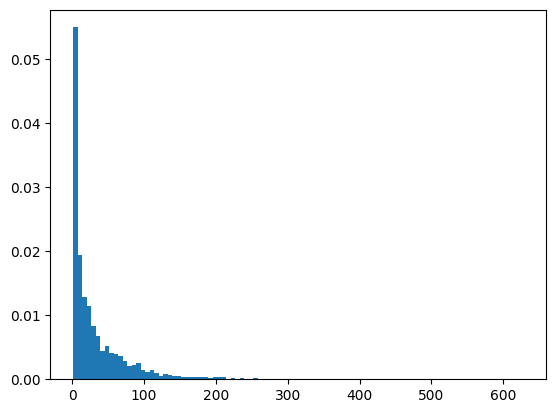

In [40]:
plt.hist(data['number_of_reviews'], density=True, bins=100)
plt.plot()

[]

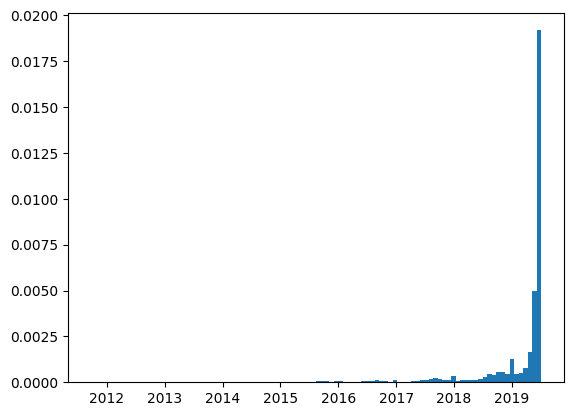

In [42]:
plt.hist(data['last_review'], density=True, bins=100)
plt.plot()

[]

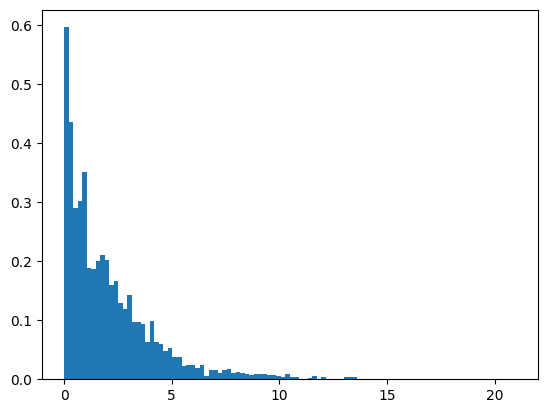

In [43]:
plt.hist(data['reviews_per_month'], density=True, bins=100)
plt.plot()

In [44]:
median_number_of_reviews = data['number_of_reviews'].median()
median_last_review = data['last_review'].median()
median_reviews_per_month = data['reviews_per_month'].median()

print(f"Nilai median untuk kolom number_of_reviews : {median_number_of_reviews}")
print(f"Nilai median untuk kolom last_review : {median_last_review}")
print(f"Nilai median untuk kolom reviews_per_month : {median_reviews_per_month}")

Nilai median untuk kolom number_of_reviews : 15.0
Nilai median untuk kolom last_review : 2019-06-16 00:00:00
Nilai median untuk kolom reviews_per_month : 1.52


In [45]:
# kita lakukan imputasi
data['number_of_reviews'] = data['number_of_reviews'].fillna(median_number_of_reviews)
data['last_review'] = data['last_review'].fillna(median_last_review)
data['reviews_per_month'] = data['reviews_per_month'].fillna(median_reviews_per_month)

In [46]:
data.isna().sum()

id                     0
name                   0
host_id                0
host_name              0
neighbourhood_group    0
neighbourhood          0
latitude               0
longitude              0
room_type              0
price                  0
minimum_nights         0
number_of_reviews      0
last_review            0
reviews_per_month      0
availability_365       0
dtype: int64

###Penyesuaian kolom *last_review*

Untuk kolom last_review karena yang diambil hanya tanggalnya, maka kita replace nilai 2019-06-16 00:00:00 menjadi tanggalnya saja yaitu 2019-06-16

In [47]:
data['last_review'] = data['last_review'].replace("2019-06-16 00:00:00", "2019-06-16")

###Visualisasi Data

[]

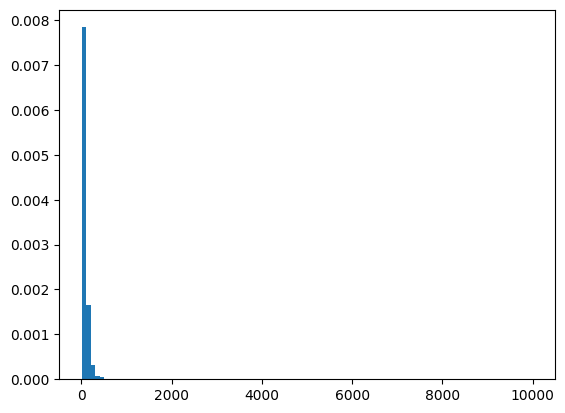

In [48]:
plt.hist(data['price'], density=True, bins=100)
plt.plot()

[]

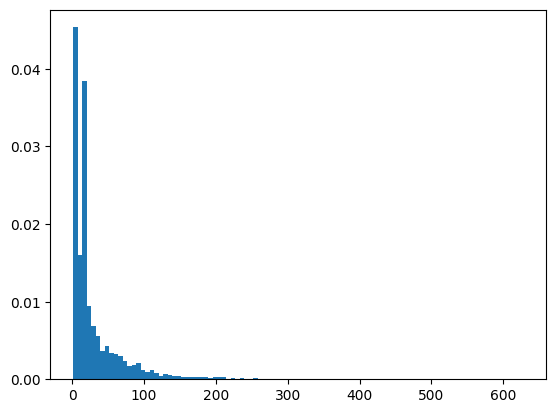

In [49]:
plt.hist(data['number_of_reviews'], density=True, bins=100)
plt.plot()

[]

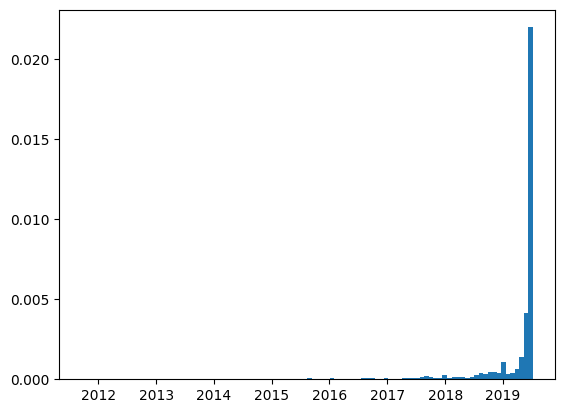

In [50]:
plt.hist(data['last_review'], density=True, bins=100)
plt.plot()

[]

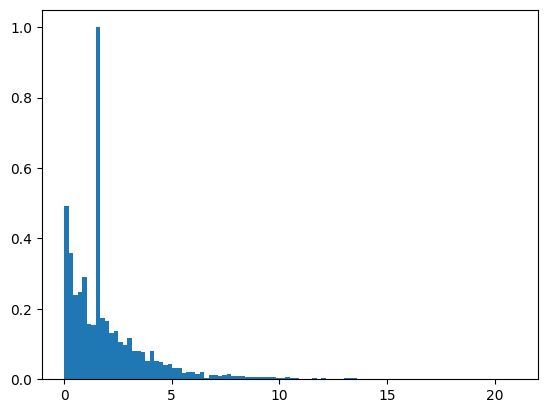

In [51]:
plt.hist(data['reviews_per_month'], density=True, bins=100)
plt.plot()